# GPT-2 Model Architecture

This notebook is an exploration of the GPT-2 model architecture. The notebook moves through each layer of the model, except that it saves the attention module for last.

This exploration was made possible by the excellent book, [Build a Large Language Model (From Scratch)](https://www.amazon.com/Build-Large-Language-Model-Scratch-ebook/dp/B0DGQXVK62) by Sebastian Raschka. The book is accompanied by a [GitHub repository](https://github.com/rasbt/LLMs-from-scratch) that contains the code for the book.

The architecture diagram and the attention diagrams below are from the book.

<img src="images/GPT-2_model_architecture.png" style="width: 500px !important; min-width: 500px !important;"/>


# 1. Tokenization



In [3]:
import tiktoken

# Load the GPT-2 tokenizer
tokenizer = tiktoken.get_encoding("gpt2")


In [41]:
from prettytable import PrettyTable

def display_tokenization_results(token_ids, tokenizer, title="Tokenization Results"):
    """
    Creates a table to display token IDs and their decoded tokens.
    
    Args:
        token_ids (list[int]): List of token IDs to display.
        tokenizer: The tokenizer object used for decoding.
        title (str): Title for the table display.
    """
    # Decode the token_ids one by one
    tokens = [f"'{tokenizer.decode([tid])!s}'" for tid in token_ids]

    # Create a table for display
    table = PrettyTable(["Token ID", "Token"])
    for tid, tok in zip(token_ids, tokens):
        table.add_row([tid, tok])

    print(title)
    print(table)


In [43]:
# Simple sentence example
sentence = "It was a bright sunny day."

# Tokenize
token_ids = tokenizer.encode(sentence)

display_tokenization_results(token_ids, tokenizer, "Simple Sentence Tokenization")


Simple Sentence Tokenization
+----------+-----------+
| Token ID |   Token   |
+----------+-----------+
|   1026   |    'It'   |
|   373    |   ' was'  |
|   257    |    ' a'   |
|   6016   | ' bright' |
|  27737   |  ' sunny' |
|   1110   |   ' day'  |
|    13    |    '.'    |
+----------+-----------+


In [6]:
# Paragraph example
paragraph = (
    "The sun rose over the Misty Mountains, casting its golden rays on the hobbits."
    " Elrond looked at Frodo and said, 'A journey lies ahead through the uncharted lands of Mordor.'"
)

# Add a made-up word to the text
paragraph += " Glarfangor is a place known only to the ancients of dfkju."

# Tokenize
token_ids = tokenizer.encode(paragraph)

display_tokenization_results(token_ids, tokenizer, "Paragraph Tokenization (Lord of the Rings Example)")

Paragraph Tokenization (Lord of the Rings Example)
+----------+--------------+
| Token ID |    Token     |
+----------+--------------+
|   464    |    'The'     |
|   4252   |    ' sun'    |
|   8278   |   ' rose'    |
|   625    |   ' over'    |
|   262    |    ' the'    |
|  47330   |   ' Misty'   |
|  21124   | ' Mountains' |
|    11    |     ','      |
|  13092   |  ' casting'  |
|   663    |    ' its'    |
|  10861   |  ' golden'   |
|  24823   |   ' rays'    |
|   319    |    ' on'     |
|   262    |    ' the'    |
|  32724   |    ' hob'    |
|   9895   |    'bits'    |
|    13    |     '.'      |
|   2574   |    ' El'     |
|    81    |     'r'      |
|   623    |    'ond'     |
|   3114   |  ' looked'   |
|   379    |    ' at'     |
|   9734   |    ' Fro'    |
|   4598   |     'do'     |
|   290    |    ' and'    |
|   531    |   ' said'    |
|    11    |     ','      |
|   705    |     ' ''     |
|    32    |     'A'      |
|   7002   |  ' journey'  |
|   7363   |   ' lies'   

In [7]:
# Python code example
code_snippet = """
def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)
"""

# Tokenize
token_ids = tokenizer.encode(code_snippet)

display_tokenization_results(token_ids, tokenizer, "Python Code Tokenization")


Python Code Tokenization
+----------+-----------+
| Token ID |   Token   |
+----------+-----------+
|   198    |     '     |
|          |     '     |
|   4299   |   'def'   |
|  12900   |   ' fib'  |
|   261    |    'on'   |
|  44456   |   'acci'  |
|    7     |    '('    |
|    77    |    'n'    |
|   2599   |    '):'   |
|   198    |     '     |
|          |     '     |
|   220    |    ' '    |
|   220    |    ' '    |
|   220    |    ' '    |
|   611    |   ' if'   |
|   299    |    ' n'   |
|  19841   |   ' <='   |
|   352    |    ' 1'   |
|    25    |    ':'    |
|   198    |     '     |
|          |     '     |
|   220    |    ' '    |
|   220    |    ' '    |
|   220    |    ' '    |
|   220    |    ' '    |
|   220    |    ' '    |
|   220    |    ' '    |
|   220    |    ' '    |
|   1441   | ' return' |
|   299    |    ' n'   |
|   198    |     '     |
|          |     '     |
|   220    |    ' '    |
|   220    |    ' '    |
|   220    |    ' '    |
|   1441   | ' return' |


# 2. Token Embedding

Takeaways

- Illustrates basic creation and usage of a Pytorch Neural Network module
- Each token id is mapped to an embedding vector
- nn.Embedding provides n embeddings (in this case, n is the vocab size)
- nn.Embedding provides a simple lookup table where embeddings are stored by index
- The embeddings are initialized to random values, and then updated during training

In [40]:
import torch
import torch.nn as nn

class GPT2Model_v1(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)

        print("There is a row for each token id in the vocabulary.")
        print(f"Shape of token embedding matrix: {self.token_embedding.weight.shape}\n")
        

    def forward(self, token_ids):
        return self.token_embedding(token_ids)

# Create the model. 50257 is the vocab size of GPT-2. GPT-2
# normally uses 768 dimensions for its embeddings, but we're
# using 4 for illustration purposes.
model = GPT2Model_v1(vocab_size=50257, embedding_dim=4)

# Example usage with a short phrase
phrase = "Every effort moves you"
token_ids = torch.tensor(tokenizer.encode(phrase))
print(f"Token IDs for \"{phrase}\": {token_ids}\n")

# Get embeddings
output = model(token_ids)

print("Each row below is an embedding for a token in the phrase\n")
print(output)




def visualize_token_embeddings(phrase, token_ids, embeddings):
    tokens = tokenizer.encode(phrase)
    decoded_tokens = [f"'{tokenizer.decode([tid])}'" for tid in tokens]
    
    # Find the maximum lengths for alignment
    max_token_len = max(len(str(t)) for t in decoded_tokens)
    max_id_len = max(len(str(id)) for id in token_ids)
    
    print("\nToken to Embedding Visualization:")
    print("=" * 80)
    for token, tid, emb in zip(decoded_tokens, token_ids, embeddings):
        # Format the embedding values to 2 decimal places
        emb_str = [f"{x:6.2f}" for x in emb.tolist()]
        print(f"{token:<{max_token_len}} => [{tid:>{max_id_len}}] => [{', '.join(emb_str)}]")
    print("=" * 80)

# Call the visualization function
visualize_token_embeddings(phrase, token_ids, output)

There is a row for each token id in the vocabulary.
Shape of token embedding matrix: torch.Size([50257, 4])

Token IDs for "Every effort moves you": tensor([6109, 3626, 6100,  345])

Each row below is an embedding for a token in the phrase

tensor([[ 1.9554,  0.7739,  0.7334, -0.4998],
        [-0.4199, -1.5651,  0.5072,  1.0647],
        [-0.6464, -2.0895,  0.0183,  0.5009],
        [-0.5884, -1.1879, -1.3001,  0.7635]], grad_fn=<EmbeddingBackward0>)

Token to Embedding Visualization:
'Every'   => [        6109] => [  1.96,   0.77,   0.73,  -0.50]
' effort' => [        3626] => [ -0.42,  -1.57,   0.51,   1.06]
' moves'  => [        6100] => [ -0.65,  -2.09,   0.02,   0.50]
' you'    => [         345] => [ -0.59,  -1.19,  -1.30,   0.76]


In [9]:
# Get token ID for "every" by encoding it directly
word = "Every"
token_id = torch.tensor(tokenizer.encode(word))[0]
token_embedding = model.token_embedding(token_id)

print(f"\nEmbedding for '{word}':")
print(token_embedding)



Embedding for 'Every':
tensor([1.3280, 0.2024, 1.1046, 2.1650], grad_fn=<EmbeddingBackward0>)


# 3. Position Embedding

Even though the tokens are in order in the matrix, by default, none of the math takes that order into account. That means that without somehow encoding the position of the tokens, the model treats the words as an unordered bag of words.

We want to somehow encode the position of the tokens into the model. This is done by shifting the tokens in the embedding space, depending on their position in the sequence.

Takeaways:

- Position embeddings are the same for any token at that position
- Position embeddings are fetched by index, where index is the position of the token in the sequence
- Position embeddings is part of what created the context limit of the GPT-2 model. The training data didn't have sequences longer than 1024, and the position embeddings only had 1024 rows.

In [10]:
class GPT2Model_v2(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_length=1024):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(context_length, embedding_dim)
        
    def forward(self, token_ids):
        # Create position indices (0, 1, 2, ...) for each token
        positions = torch.arange(len(token_ids))
        print(f"\nPositions created from torch.arange: {positions}")
        
        # Get both embeddings
        token_embeddings = self.token_embedding(token_ids)
        position_embeddings = self.position_embedding(positions)
        
        # For debugging, print the individual components
        print("\nDebugging Position Embeddings:")
        print("\nPosition embeddings (one vector per position):")
        print(position_embeddings)
        print("\nToken embeddings (one vector per token):")
        print(token_embeddings)
        print("\nCombined embeddings (token + position):")
        
        # Combine the embeddings
        output = token_embeddings + position_embeddings
        
        return output

# Create model and test with example
model = GPT2Model_v2(vocab_size=50257, embedding_dim=4)

# Example usage with a short phrase
phrase = "Every effort moves you"
token_ids = torch.tensor(tokenizer.encode(phrase))
print(phrase)
output = model(token_ids)

# Another phrase to illustrate that position embeddings don't change
phrase = "Cow goes over moon"
token_ids = torch.tensor(tokenizer.encode(phrase))
print(phrase)
output = model(token_ids)

Every effort moves you

Positions created from torch.arange: tensor([0, 1, 2, 3])

Debugging Position Embeddings:

Position embeddings (one vector per position):
tensor([[-0.3797,  0.7751, -0.0879, -0.5987],
        [ 0.4340,  1.5447,  0.6459, -1.0377],
        [ 0.3859,  1.1731,  0.7061, -0.2885],
        [-1.1458, -0.7267,  2.4105, -0.4081]], grad_fn=<EmbeddingBackward0>)

Token embeddings (one vector per token):
tensor([[-0.4092, -0.7957,  0.0608,  1.0733],
        [-2.2476, -0.0578,  0.2714,  0.3669],
        [ 0.7550, -0.2364,  0.4187,  1.5105],
        [-0.3277,  0.1382,  0.5366,  1.2561]], grad_fn=<EmbeddingBackward0>)

Combined embeddings (token + position):
Cow goes over moon

Positions created from torch.arange: tensor([0, 1, 2, 3])

Debugging Position Embeddings:

Position embeddings (one vector per position):
tensor([[-0.3797,  0.7751, -0.0879, -0.5987],
        [ 0.4340,  1.5447,  0.6459, -1.0377],
        [ 0.3859,  1.1731,  0.7061, -0.2885],
        [-1.1458, -0.7267,  2

# 4. Dropout

During dropout, a random number of weights are set to 0. This encourages the model to distribute its learning across weights. Dropout layers are only active during training, and are inactive during evaluation (inference).

There are analogies here with how the brain deals with the loss of synapses (i.e., the connections between neurons which are lost and formed very regularly). Consider also how we handle regular hard drive failure with RAID 5/6 which allows for reconstruction after corruption.

In [11]:
class GPT2Model_v3(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_length=1024, dropout_prob=0.1):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(context_length, embedding_dim)
        self.dropout = nn.Dropout(p=dropout_prob)
        
    def forward(self, token_ids):
        # Create position indices (0, 1, 2, ...) for each token
        positions = torch.arange(len(token_ids))
        
        # Get both embeddings
        token_embeddings = self.token_embedding(token_ids)
        position_embeddings = self.position_embedding(positions)
        
        # Combine embeddings
        combined_embeddings = token_embeddings + position_embeddings
        
        # Apply dropout and visualize the effect
        dropped_embeddings = self.dropout(combined_embeddings)
        
        # Visualize dropout effect
        def visualize_dropout(original, dropped, row_idx=0):
            print("\nDropout Visualization (█ = kept, · = dropped):")
            print(f"Showing embeddings for token at position {row_idx}")
            
            # Create visualization
            original_row = original[row_idx]
            dropped_row = dropped[row_idx]
            
            print("Original:", end=" ")
            for val in original_row:
                print("█", end="")
            print()
            
            print("Dropped: ", end=" ")
            for o, d in zip(original_row, dropped_row):
                print("█" if d != 0 else "·", end="")
            print()
            
            # Calculate and display dropout statistics
            total = len(original_row)
            kept = (dropped_row != 0).sum().item()
            print(f"\nDropout Stats:")
            print(f"Total elements: {total}")
            print(f"Elements kept: {kept} ({(kept/total)*100:.1f}%)")
            print(f"Elements dropped: {total-kept} ({((total-kept)/total)*100:.1f}%)")
        
        visualize_dropout(combined_embeddings, dropped_embeddings)
        
        return dropped_embeddings

# Create model and test
model = GPT2Model_v3(vocab_size=50257, embedding_dim=32, dropout_prob=0.2)  # Using 32 dims for better visualization

# Test with example phrase
phrase = "The quick brown fox"
token_ids = torch.tensor(tokenizer.encode(phrase))

# Set model to training mode (dropout active)
model.train()
print("\nIn Training Mode (dropout active):")
output_train = model(token_ids)

# Set model to evaluation mode (dropout inactive)
model.eval()
print("\nIn Evaluation Mode (dropout inactive):")
output_eval = model(token_ids)

# Show that dropout is deterministic in eval mode but random in train mode
model.train()
print("\nMultiple runs in training mode (notice the different patterns):")
for i in range(2):
    print(f"\nRun {i+1}:")
    _ = model(token_ids)


In Training Mode (dropout active):

Dropout Visualization (█ = kept, · = dropped):
Showing embeddings for token at position 0
Original: ████████████████████████████████
Dropped:  █·█████·██████████████·███·█████

Dropout Stats:
Total elements: 32
Elements kept: 28 (87.5%)
Elements dropped: 4 (12.5%)

In Evaluation Mode (dropout inactive):

Dropout Visualization (█ = kept, · = dropped):
Showing embeddings for token at position 0
Original: ████████████████████████████████
Dropped:  ████████████████████████████████

Dropout Stats:
Total elements: 32
Elements kept: 32 (100.0%)
Elements dropped: 0 (0.0%)

Multiple runs in training mode (notice the different patterns):

Run 1:

Dropout Visualization (█ = kept, · = dropped):
Showing embeddings for token at position 0
Original: ████████████████████████████████
Dropped:  ███████·████████···█··██·███████

Dropout Stats:
Total elements: 32
Elements kept: 25 (78.1%)
Elements dropped: 7 (21.9%)

Run 2:

Dropout Visualization (█ = kept, · = dropped

# 5. Layer Normalization

Developing a neural network that is stable during training, that is, will converge to good values that have low error, is a balancing act between exploding and vanishing gradients.

In order to keep the gradients from exploding or vanishing, we add normalization layers that re-centers the mean to 0 and the variance to 1. We do add in scale and shift parameters to allow the model to learn adjustments to the mean and variance.

In [12]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift
    


In [13]:
# Let's look at two different embedding vectors
import torch

# Example 1: Small numbers
small_vec = torch.tensor([0.1, 0.2, 0.3, 0.4], dtype=torch.float)
print("Original small vector:", small_vec)
print("Mean:", small_vec.mean().item())
print("Variance:", small_vec.var().item())

# Normalize it
small_normalized = (small_vec - small_vec.mean()) / torch.sqrt(small_vec.var() + 1e-5)
print("\nNormalized small vector:", small_normalized)
print("New mean:", small_normalized.mean().item())
print("New variance:", small_normalized.var().item())

# Example 2: Big numbers
big_vec = torch.tensor([100., 200., 300., 400.], dtype=torch.float)  # Added decimal points and dtype
print("\nOriginal big vector:", big_vec)
print("Mean:", big_vec.mean().item())
print("Variance:", big_vec.var().item())

# Normalize it
big_normalized = (big_vec - big_vec.mean()) / torch.sqrt(big_vec.var() + 1e-5)
print("\nNormalized big vector:", big_normalized)
print("New mean:", big_normalized.mean().item())
print("New variance:", big_normalized.var().item())

Original small vector: tensor([0.1000, 0.2000, 0.3000, 0.4000])
Mean: 0.25
Variance: 0.01666666753590107

Normalized small vector: tensor([-1.1615, -0.3872,  0.3872,  1.1615])
New mean: 2.9802322387695312e-08
New variance: 0.9994003772735596

Original big vector: tensor([100., 200., 300., 400.])
Mean: 250.0
Variance: 16666.666015625

Normalized big vector: tensor([-1.1619, -0.3873,  0.3873,  1.1619])
New mean: 0.0
New variance: 1.0


In [14]:
class GPT2Model_v4(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_length=1024, dropout_prob=0.1):
        super().__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(context_length, embedding_dim)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.layer_norm = LayerNorm(embedding_dim) 
        
    def forward(self, token_ids):
        # Get positions and embeddings
        positions = torch.arange(len(token_ids))
        token_embeddings = self.token_embedding(token_ids)
        position_embeddings = self.position_embedding(positions)
        
        # Combine embeddings and apply dropout
        x = token_embeddings + position_embeddings
        x = self.dropout(x)
        
        # Print statistics before normalization
        print("\nBefore Layer Normalization:")
        print(f"Mean: {x.mean().item():.3f}")
        print(f"Variance: {x.var().item():.3f}")
        print(f"Max value: {x.max().item():.3f}")
        print(f"Min value: {x.min().item():.3f}")
        
        # Apply layer normalization
        x = self.layer_norm(x)
        
        # Print statistics after normalization
        print("\nAfter Layer Normalization:")
        print(f"Mean: {x.mean().item():.3f}")
        print(f"Variance: {x.var().item():.3f}")
        print(f"Max value: {x.max().item():.3f}")
        print(f"Min value: {x.min().item():.3f}")
        
        return x

# Create model instance
model = GPT2Model_v4(
    vocab_size=50257,  # GPT-2 vocabulary size
    embedding_dim=768,  # GPT-2 embedding dimension
    dropout_prob=0.1
)

# Test with a sample input
sample_text = "The quick brown fox jumps over the lazy dog"
token_ids = torch.tensor(tokenizer.encode(sample_text))
output = model(token_ids)

print("\nFinal output dimensions:")
print(output.shape)


Before Layer Normalization:
Mean: -0.003
Variance: 2.258
Max value: 6.267
Min value: -6.301

After Layer Normalization:
Mean: 0.000
Variance: 1.000
Max value: 3.917
Min value: -4.216

Final output dimensions:
torch.Size([9, 768])


# 6. Feed Forward

A feed forward network has N number of linear transformations (layers). In the case of the GPT-2 transformer, there is a linear layer that expands the embeddings from 768 to 3072, applies a GELU activation function, and then applies a linear transformation to reduce the dimensionality back to 768.

Takeaways

- A linear transformation is implemented as a matrix multiplication plus a bias term.
- GELU activation has smoother derivatives than ReLU, which helps with gradient stability.

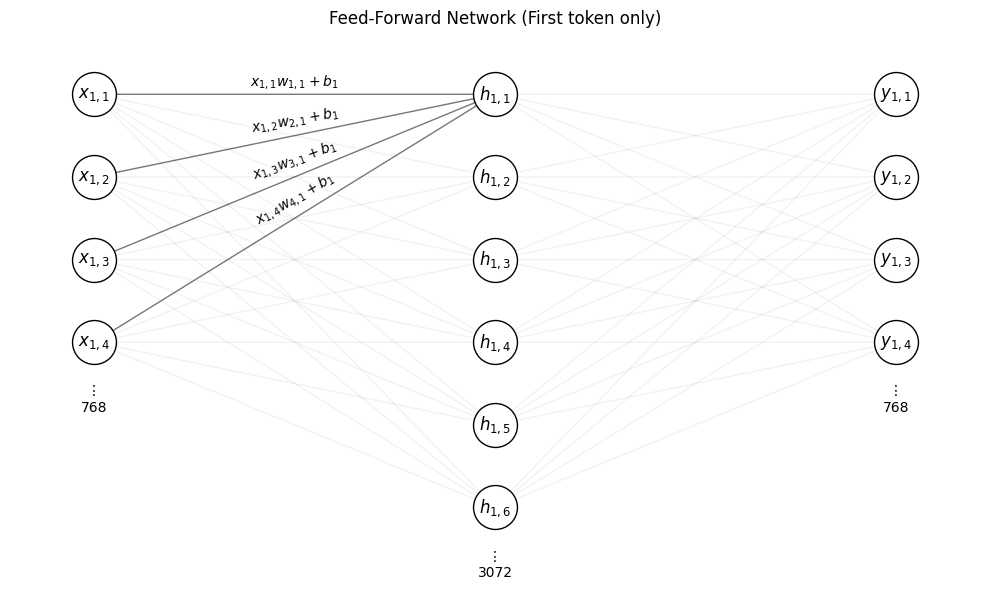

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def draw_single_row_ffn(n_input=4, n_hidden=6, n_output=4):
    plt.figure(figsize=(10, 6))
    
    # Create positions for nodes
    input_pos = {f'x_{i}': (0, -i) for i in range(1, n_input+1)}
    hidden_pos = {f'h_{i}': (1.5, -i) for i in range(1, n_hidden+1)}
    output_pos = {f'y_{i}': (3, -i) for i in range(1, n_output+1)}
    
    pos = {**input_pos, **hidden_pos, **output_pos}
    
    G = nx.DiGraph()
    
    # Add nodes and edges (same as before)
    input_nodes = [f'x_{i}' for i in range(1, n_input+1)]
    hidden_nodes = [f'h_{i}' for i in range(1, n_hidden+1)]
    output_nodes = [f'y_{i}' for i in range(1, n_output+1)]
    
    G.add_nodes_from(input_nodes + hidden_nodes + output_nodes)
    edges = [(i, h) for i in input_nodes for h in hidden_nodes] + \
           [(h, o) for h in hidden_nodes for o in output_nodes]
    G.add_edges_from(edges)
    
    # Draw the network
    plt.subplot(111)
    
    # Draw all edges with low alpha
    nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
    
    # Draw edges into h_1 with higher alpha
    edges_to_h1 = [(f'x_{i}', 'h_1') for i in range(1, n_input+1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges_to_h1, alpha=0.5)
    
    for i in range(1, n_input+1):
        start = pos[f'x_{i}']
        end = pos['h_1']
        
        # Manual angles that increase as we go down (negative for upward slope)
        if i == 1:
            angle = 0      # Top line is horizontal
            y_offset = 0.05
        elif i == 2:
            angle = 10    # Slight upward angle
            y_offset = -0.01
        elif i == 3:
            angle = 20    # More upward angle
            y_offset = -0.07
        else:
            angle = 30    # Steepest upward angle
            y_offset = -0.12
        
        mid_x = (start[0] + end[0]) / 2
        mid_y = (start[1] + end[1]) / 2
        
        plt.text(mid_x, mid_y + y_offset, f'$x_{{{1},{i}}}w_{{{i},1}} + b_1$', 
                rotation=angle,
                ha='center', va='bottom', fontsize=10)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                          nodelist=input_nodes + hidden_nodes + output_nodes,
                          node_color='white', 
                          edgecolors='black',
                          node_size=1000)
    
    # Add labels
    labels = {}
    for node in G.nodes():
        if node.startswith('x'):
            i = node.split('_')[1]
            labels[node] = f'$x_{{{1},{i}}}$'
        elif node.startswith('h'):
            i = node.split('_')[1]
            labels[node] = f'$h_{{{1},{i}}}$'
        elif node.startswith('y'):
            i = node.split('_')[1]
            labels[node] = f'$y_{{{1},{i}}}$'
            
    nx.draw_networkx_labels(G, pos, labels, font_size=12)
    
    # Add dots to indicate more nodes
    plt.text(0, -n_input-0.5, '⋮\n768', ha='center', va='top')
    plt.text(1.5, -n_hidden-0.5, '⋮\n3072', ha='center', va='top')
    plt.text(3, -n_output-0.5, '⋮\n768', ha='center', va='top')
    
    plt.title('Feed-Forward Network (First token only)', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Draw with fewer nodes for clarity
draw_single_row_ffn(n_input=4, n_hidden=6, n_output=4)

In [16]:
from IPython.display import display, Math

# n is sequence length (let's say n=4 for example)
display(Math(r'''
\begin{bmatrix} 
x_{1,1} & x_{1,2} & \cdots & x_{1,768} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,768} \\
x_{3,1} & x_{3,2} & \cdots & x_{3,768} \\
x_{4,1} & x_{4,2} & \cdots & x_{4,768}
\end{bmatrix} \times
\begin{bmatrix} 
w_{1,1} & w_{1,2} & \cdots & w_{1,3072} \\
w_{2,1} & w_{2,2} & \cdots & w_{2,3072} \\
\vdots & \vdots & \ddots & \vdots \\
w_{768,1} & w_{768,2} & \cdots & w_{768,3072}
\end{bmatrix} + 
\begin{bmatrix} 
b_1 & b_2 & \cdots & b_{3072} \\
b_1 & b_2 & \cdots & b_{3072} \\
b_1 & b_2 & \cdots & b_{3072} \\
b_1 & b_2 & \cdots & b_{3072}
\end{bmatrix} =
\begin{bmatrix} 
h_{1,1} & h_{1,2} & \cdots & h_{1,3072} \\
h_{2,1} & h_{2,2} & \cdots & h_{2,3072} \\
h_{3,1} & h_{3,2} & \cdots & h_{3,3072} \\
h_{4,1} & h_{4,2} & \cdots & h_{4,3072}
\end{bmatrix}
'''))

<IPython.core.display.Math object>

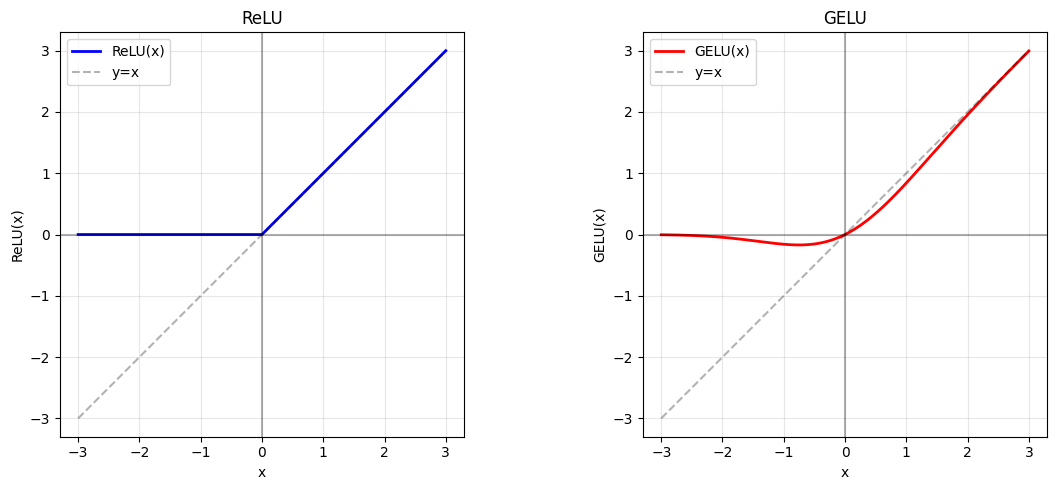

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Generate x values
x = np.linspace(-3, 3, 1000)

# Plot ReLU
ax1.plot(x, relu(x), 'b-', linewidth=2, label='ReLU(x)')
ax1.plot(x, x, 'k--', alpha=0.3, label='y=x')  # 45-degree line
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax1.set_title('ReLU')
ax1.set_xlabel('x')
ax1.set_ylabel('ReLU(x)')
ax1.set_aspect('equal')  # Make scales equal
ax1.legend()

# Plot GELU
ax2.plot(x, gelu(x), 'r-', linewidth=2, label='GELU(x)')
ax2.plot(x, x, 'k--', alpha=0.3, label='y=x')  # 45-degree line
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax2.set_title('GELU')
ax2.set_xlabel('x')
ax2.set_ylabel('GELU(x)')
ax2.set_aspect('equal')  # Make scales equal
ax2.legend()

plt.tight_layout()
plt.show()

In [18]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))


class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.linear1 = nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"])
        self.gelu = GELU()
        self.linear2 = nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])

    def forward(self, x):
        x = self.linear1(x)
        x = self.gelu(x)
        x = self.linear2(x)
        return x

In [19]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.ff = FeedForward(cfg)
        self.norm = LayerNorm(cfg["emb_dim"])
        self.drop = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        x = self.norm(x)
        x = self.ff(x)
        x = self.drop(x)
        return x

class GPT2Model_v5(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_length=1024, dropout_prob=0.1, n_blocks=12):
        super().__init__()
        # Configuration dictionary
        cfg = {
            "emb_dim": embedding_dim,
            "context_length": context_length,
            "drop_rate": dropout_prob
        }
        
        # Embeddings
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(context_length, embedding_dim)
        self.dropout = nn.Dropout(dropout_prob)
        
        # Create 12 transformer blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(cfg) for _ in range(n_blocks)
        ])
        
        # Final layer norm
        self.final_norm = LayerNorm(embedding_dim)
        
    def forward(self, token_ids):
        # Get positions and embeddings
        positions = torch.arange(len(token_ids))
        token_embeddings = self.token_embedding(token_ids)
        position_embeddings = self.position_embedding(positions)
        
        # Combine embeddings and apply dropout
        x = token_embeddings + position_embeddings
        x = self.dropout(x)
        
        # Pass through each transformer block
        for block in self.blocks:
            x = block(x)
            
        # Final normalization
        x = self.final_norm(x)
        
        return x
    
# Create model instance
model = GPT2Model_v5(
    vocab_size=50257,  # GPT-2 vocabulary size
    embedding_dim=768,  # GPT-2 embedding dimension
    dropout_prob=0.1
)

# Test with a sample input
sample_text = "The quick brown fox jumps over the lazy dog"
token_ids = torch.tensor(tokenizer.encode(sample_text))
output = model(token_ids)

print("Input dimensions:")
print(token_ids.shape)
print("\nFinal output dimensions:")
print(output.shape)

Input dimensions:
torch.Size([9])

Final output dimensions:
torch.Size([9, 768])


# 7. Shortcut Connections

Prior research showed that gradients were vanishing for deep networks, i.e., over 20 layers. In order allow for deeper networks, shortcut connections were added.


In [20]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.ff = FeedForward(cfg)
        self.norm = LayerNorm(cfg["emb_dim"])
        self.drop = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Store original input for shortcut
        shortcut = x
        
        # Main computation path
        x = self.norm(x)
        x = self.ff(x)
        x = self.drop(x)
        
        # Add shortcut connection (residual connection)
        x = x + shortcut

        return x

# 8. Output Layer

In the final layer, the output is projected back to the vocabulary size. This allows it to assign a probability to each token in the vocabulary.

Takeaways

- Logits are raw scores that can be converted to probabilities using a softmax function
- You can also choose the top-k highest probability tokens and sample from them

In [21]:
class GPT2Model_v6(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_length=1024, dropout_prob=0.1, n_blocks=12):
        super().__init__()
        # Configuration dictionary
        cfg = {
            "emb_dim": embedding_dim,
            "context_length": context_length,
            "drop_rate": dropout_prob
        }
        
        # Embeddings
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(context_length, embedding_dim)
        self.dropout = nn.Dropout(dropout_prob)
        
        # Transformer blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(cfg) for _ in range(n_blocks)
        ])
        
        # Final layer norm
        self.final_norm = LayerNorm(embedding_dim)
        
        # Output layer - projects back to vocabulary size
        self.output_layer = nn.Linear(embedding_dim, vocab_size)
        
    def forward(self, token_ids):
        # Get positions and embeddings
        positions = torch.arange(len(token_ids))
        token_embeddings = self.token_embedding(token_ids)
        position_embeddings = self.position_embedding(positions)
        
        # Combine embeddings and apply dropout
        x = token_embeddings + position_embeddings
        x = self.dropout(x)
        
        # Pass through transformer blocks
        for block in self.blocks:
            x = block(x)
            
        # Final normalization
        x = self.final_norm(x)
        
        # Project to vocabulary size
        return self.output_layer(x)  # Shape: [sequence_length, vocab_size]

# Example usage:
model = GPT2Model_v6(
    vocab_size=50257,
    embedding_dim=768,
    dropout_prob=0.1
)

# Test with sample input
sample_text = "The quick brown fox jumps over the"
token_ids = torch.tensor(tokenizer.encode(sample_text))

# Get logits from model
logits = model(token_ids)  # Shape: [sequence_length, vocab_size]

# Convert to probabilities (in calling code)
probs = torch.nn.functional.softmax(logits, dim=-1)

# Get next token prediction (in calling code)
next_token_probs = probs[-1]  # Get probabilities for last position
next_token_id = torch.argmax(next_token_probs).item()
predicted_token = tokenizer.decode([next_token_id])

print(f"Input dimensions: {token_ids.shape}\n")
print(f"Final output dimensions: {logits.shape}\n")

print(f"Input text: {sample_text}")
print(f"Predicted next token: '{predicted_token}'")

Input dimensions: torch.Size([7])

Final output dimensions: torch.Size([7, 50257])

Input text: The quick brown fox jumps over the
Predicted next token: ' selector'


# 9. Attention

The heart of the transformer is the attention mechanism. It allows the model to focus on the most relevant parts of the input sequence.

## Vector similarity via the dot product

The dot product between two vectors **a** and **b** is:

**a · b** = |**a**| |**b**| cos(θ)

where:
- |**a**| and |**b**| are the lengths (magnitudes) of the vectors
- θ is the angle between them
- cos(θ) tells us how similar their directions are:
  - cos(0°) = 1 (same direction)
  - cos(90°) = 0 (perpendicular)
  - cos(180°) = -1 (opposite directions)

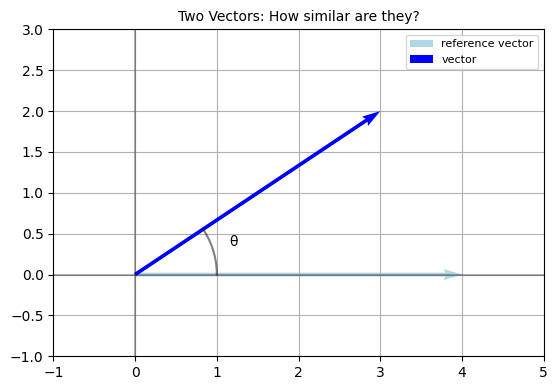

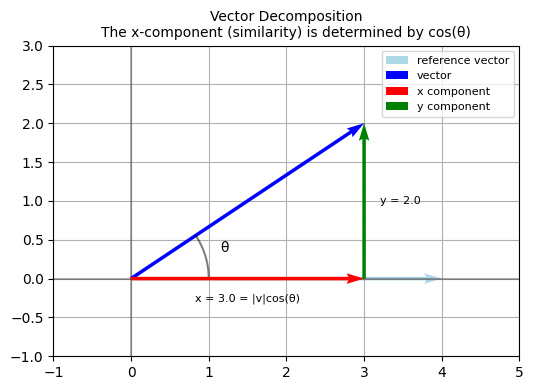

In [39]:
# First plot: Just the vectors
def plot_vectors():
    fig = plt.figure(figsize=(6, 4))  # Reduced from (10, 6)
    ax = fig.add_subplot(111)
    
    # Example vector
    v = np.array([3, 2])
    ref_v = np.array([4, 0])
    
    # Plot vectors
    ax.quiver(0, 0, ref_v[0], ref_v[1], angles='xy', scale_units='xy', scale=1, 
             color='lightblue', label='reference vector', zorder=1)
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
             color='blue', label='vector', zorder=2)
    
    # Add angle arc
    radius = 1.0
    angle = np.arctan2(v[1], v[0])
    theta_rad = np.linspace(0, angle, 100)
    ax.plot(radius * np.cos(theta_rad), radius * np.sin(theta_rad), 'k-', alpha=0.5)
    mid_angle = angle/2
    ax.text(radius * np.cos(mid_angle) * 1.2, radius * np.sin(mid_angle) * 1.2, 
            'θ', fontsize=10)  # Reduced from 14
    
    ax.set_title('Two Vectors: How similar are they?', fontsize=10)
    ax.grid(True)
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 3)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    ax.legend(fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Second plot: Decomposition
def plot_vector_decomposition():
    fig = plt.figure(figsize=(6, 4))  # Reduced from (10, 6)
    ax = fig.add_subplot(111)
    
    # Example vector
    v = np.array([3, 2])
    angle = np.arctan2(v[1], v[0])
    ref_v = np.array([4, 0])
    
    # Plot vectors
    ax.quiver(0, 0, ref_v[0], ref_v[1], angles='xy', scale_units='xy', scale=1, 
             color='lightblue', label='reference vector', zorder=1)
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
             color='blue', label='vector', zorder=2)
    ax.quiver(0, 0, v[0], 0, angles='xy', scale_units='xy', scale=1, 
             color='red', label='x component', zorder=3)
    ax.quiver(v[0], 0, 0, v[1], angles='xy', scale_units='xy', scale=1, 
             color='green', label='y component', zorder=3)
    
    # Add dashed lines
    ax.plot([v[0], v[0]], [0, v[1]], 'k--', alpha=0.3)
    
    # Add angle arc
    radius = 1.0
    theta_rad = np.linspace(0, angle, 100)
    ax.plot(radius * np.cos(theta_rad), radius * np.sin(theta_rad), 'k-', alpha=0.5)
    mid_angle = angle/2
    ax.text(radius * np.cos(mid_angle) * 1.2, radius * np.sin(mid_angle) * 1.2, 
            'θ', fontsize=10)  # Reduced from 14
    
    # Add labels with smaller font
    ax.text(v[0]/2, -0.3, f'x = {v[0]:.1f} = |v|cos(θ)', ha='center', fontsize=8)
    ax.text(v[0]+0.2, v[1]/2, f'y = {v[1]:.1f}', va='center', fontsize=8)
    
    ax.set_title('Vector Decomposition\nThe x-component (similarity) is determined by cos(θ)', 
                fontsize=10)
    ax.grid(True)
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 3)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    ax.legend(fontsize=8)
    
    plt.tight_layout()
    plt.show()

plot_vectors()
plot_vector_decomposition()

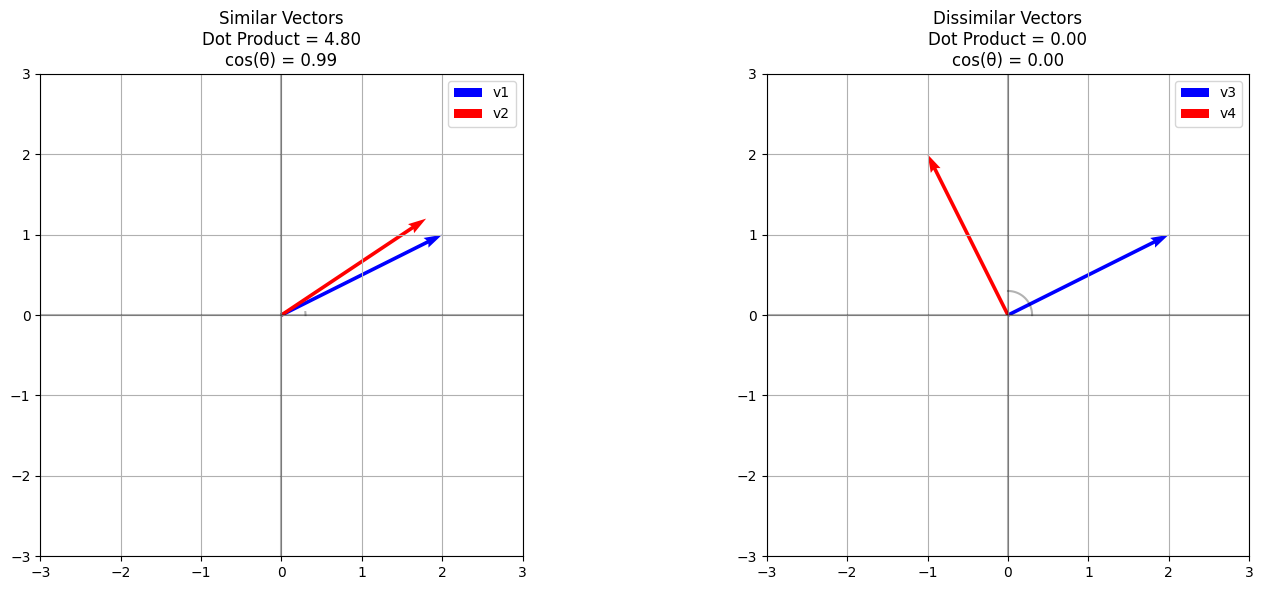

Key Points about Dot Products:
1. Dot product = |v1| * |v2| * cos(θ)
2. Similar vectors (small angle) -> Large positive dot product
3. Dissimilar vectors (large angle) -> Small or negative dot product
4. Perpendicular vectors -> Zero dot product
5. This is why dot products are useful for measuring similarity!


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dot_product_example():
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Example 1: Similar vectors (small angle)
    v1 = np.array([2, 1])
    v2 = np.array([1.8, 1.2])
    
    # Plot vectors
    ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1')
    ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red', label='v2')
    
    # Calculate and display dot product
    dot_product = np.dot(v1, v2)
    cos_theta = dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2))
    theta = np.arccos(cos_theta)
    
    # Add arc to show angle
    theta_rad = np.linspace(0, theta, 100)
    radius = 0.3
    ax1.plot(radius * np.cos(theta_rad), radius * np.sin(theta_rad), 'k-', alpha=0.3)
    
    ax1.set_title(f'Similar Vectors\nDot Product = {dot_product:.2f}\ncos(θ) = {cos_theta:.2f}')
    ax1.grid(True)
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax1.set_aspect('equal')
    ax1.legend()
    
    # Example 2: Dissimilar vectors (large angle)
    v3 = np.array([2, 1])
    v4 = np.array([-1, 2])
    
    ax2.quiver(0, 0, v3[0], v3[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v3')
    ax2.quiver(0, 0, v4[0], v4[1], angles='xy', scale_units='xy', scale=1, color='red', label='v4')
    
    # Calculate and display dot product
    dot_product = np.dot(v3, v4)
    cos_theta = dot_product / (np.linalg.norm(v3) * np.linalg.norm(v4))
    theta = np.arccos(cos_theta)
    
    # Add arc to show angle
    theta_rad = np.linspace(0, theta, 100)
    ax2.plot(radius * np.cos(theta_rad), radius * np.sin(theta_rad), 'k-', alpha=0.3)
    
    ax2.set_title(f'Dissimilar Vectors\nDot Product = {dot_product:.2f}\ncos(θ) = {cos_theta:.2f}')
    ax2.grid(True)
    ax2.set_xlim(-3, 3)
    ax2.set_ylim(-3, 3)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax2.set_aspect('equal')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("Key Points about Dot Products:")
    print("1. Dot product = |v1| * |v2| * cos(θ)")
    print("2. Similar vectors (small angle) -> Large positive dot product")
    print("3. Dissimilar vectors (large angle) -> Small or negative dot product")
    print("4. Perpendicular vectors -> Zero dot product")
    print("5. This is why dot products are useful for measuring similarity!")

plot_dot_product_example()

## Simple attention

We'll start off with a simplified attention mechanism. First, calculate the weights by taking the dot product.

<img src="images/attention_1.png" width="600"/>

Calculate a context vector by multiplying each token by its weight.

<img src="images/attention_2.png" width="600"/>

## Attention with trainable weights (Key, Query, Value matrices)

<img src="images/attention_3.png" width="600"/>

<img src="images/attention_4.png" width="600"/>

Add masks to ignore future tokens. Tokens should only be influenced by previous tokens.

<img src="images/attention_5.png" width="600"/>

Add multiple attention heads to allow the model to focus on different parts of the input sequence.

<img src="images/attention_6.png" width="600"/>

In [32]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by n_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads  # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        num_tokens, d_in = x.shape

        # Project to queries, keys, values
        keys = self.W_key(x)      # Shape: (num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # Split into heads
        keys = keys.view(num_tokens, self.num_heads, self.head_dim)
        values = values.view(num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(num_tokens, self.num_heads, self.head_dim)

        # Transpose to (num_heads, num_tokens, head_dim)
        keys = keys.transpose(0, 1)
        queries = queries.transpose(0, 1)
        values = values.transpose(0, 1)

        # Compute scaled dot-product attention with causal mask
        attn_scores = queries @ keys.transpose(1, 2)  # Dot product for each head

        # Truncate mask to current sequence length
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Apply mask and softmax
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.size(-1)**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Get context vectors
        context_vec = (attn_weights @ values).transpose(0, 1)  # Back to (num_tokens, num_heads, head_dim)
        context_vec = context_vec.reshape(num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)

        return context_vec

In [33]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # Attention layer with pre-normalization
        self.attn_norm = LayerNorm(cfg["emb_dim"])
        self.attn = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            dropout=cfg["drop_rate"],
            num_heads=cfg["n_heads"],
            qkv_bias=True
        )
        
        # Feed-forward layer with pre-normalization
        self.ff_norm = LayerNorm(cfg["emb_dim"])
        self.ff = FeedForward(cfg)
        
        # Dropouts for each path
        self.attn_drop = nn.Dropout(cfg["drop_rate"])
        self.ff_drop = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Attention path with residual connection
        attn_out = self.attn(self.attn_norm(x))
        x = x + self.attn_drop(attn_out)
        
        # Feed-forward path with residual connection
        ff_out = self.ff(self.ff_norm(x))
        x = x + self.ff_drop(ff_out)
        
        return x

class GPT2Model_v7(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_length=1024, dropout_prob=0.1, n_heads=12, n_blocks=12):
        super().__init__()
        # Configuration dictionary
        self.cfg = {
            "emb_dim": embedding_dim,
            "context_length": context_length,
            "drop_rate": dropout_prob,
            "n_heads": n_heads
        }
        
        # Embeddings
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.position_embedding = nn.Embedding(context_length, embedding_dim)
        self.dropout = nn.Dropout(dropout_prob)
        
        # Create transformer blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(self.cfg) for _ in range(n_blocks)
        ])
        
        # Final layer norm
        self.final_norm = LayerNorm(embedding_dim)
        
        # Output projection
        self.output_proj = nn.Linear(embedding_dim, vocab_size)
        
    def forward(self, token_ids):
        # Get positions and embeddings
        positions = torch.arange(len(token_ids))
        token_embeddings = self.token_embedding(token_ids)
        position_embeddings = self.position_embedding(positions)
        
        # Combine embeddings and apply dropout
        x = token_embeddings + position_embeddings
        x = self.dropout(x)
        
        # Pass through transformer blocks
        for block in self.blocks:
            x = block(x)
            
        # Final normalization
        x = self.final_norm(x)
        
        # Project to vocabulary
        logits = self.output_proj(x)
        
        return logits

In [36]:
# Create model instance
model = GPT2Model_v7(
    vocab_size=50257,  # GPT-2 vocabulary size
    embedding_dim=768,  # GPT-2 embedding dimension
    dropout_prob=0.1,
    n_heads=12,        # GPT-2 uses 12 attention heads
    n_blocks=12        # GPT-2 uses 12 transformer blocks
)

# Test with a sample input
sample_text = "The quick brown fox jumps over the lazy dog"
token_ids = torch.tensor(tokenizer.encode(sample_text))

print("Input dimensions:")
print(token_ids.shape)

# Get output from model
output = model(token_ids)

print("\nFinal output dimensions:")
print(output.shape)

# Convert to probabilities (for next token prediction)
probs = torch.nn.functional.softmax(output, dim=-1)

# Get next token prediction
next_token_probs = probs[-1]  # Get probabilities for last position
next_token_id = torch.argmax(next_token_probs).item()
predicted_token = tokenizer.decode([next_token_id])

print(f"\nInput text: {sample_text}")
print(f"Predicted next token: '{predicted_token}'")

Input dimensions:
torch.Size([9])

Final output dimensions:
torch.Size([9, 50257])

Input text: The quick brown fox jumps over the lazy dog
Predicted next token: ' surpassed'
